Вариант 46

# Набор данных:

6 (occupancy)

Классификаторы:

1 - классификатор k ближайших соседей (задается количество ближайших объектов);

3 – линейный классификатор (персептрон);

# Задание

1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

3.Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

5.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

6.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

7.Заполните пропущенные значения в данных;

8.Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Оцените качество работы классификатора.

# 1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Подключаем scikit-learn - библиотеку машинного обучения Python
# Библиотека использумется для построения моделей обучения как с учителем, так и без
import sklearn as skl
# Подключаем модуль preprocessing из библиотеки sklearn
# Этот модуль предназначен для предварительной обработки данных
# Его классы могут использоваться для стандартизации, регуляции, заполнения недостающих данных и тд.
from sklearn import preprocessing
# класс MinMaxScaler мастабирует данные в диапазоне от 0 до 1
from sklearn.preprocessing import MinMaxScaler
# класс train_test_split позволяет случайным образом разбивать данные на подмножества
from sklearn.model_selection import train_test_split
# класс GridSeachCV автоматически подбирает параметры для моделей машинного обучения
from sklearn.model_selection import GridSearchCV
# класс Perceptron - реализация модели персептрона в scikit-team.
# Модель перцептрона - простейший тип искуственной неронной сети
# Используется для задач классификации двух классов 
from sklearn.linear_model import Perceptron
# Класс KNeighborsClassifier - реализация в модели классификации ближайших соседей в scikit-team
from sklearn.neighbors import KNeighborsClassifier
# Класс CalibratedClassifierCV используется для калибровки вероятности с помощью изотонической или логической регрессии
from sklearn.calibration import CalibratedClassifierCV
# Из модуля metrics импортируем:
# 1) accuracy_score - функция, вычисляющая точность, фракции, или количество правильных предсказаний
from sklearn.metrics import accuracy_score
# 2) precision_recall_curve - функция для построения кривых preсision-recall
from sklearn.metrics import precision_recall_curve
# 3) average_precision_score - метрика для задач классификации
# Она вычисляет среднюю точность оценок предсказаний
# Используется для решения задач бинарной классификации
from sklearn.metrics import average_precision_score
# 4) roc_curve - функция для построения ROC-кривых
from sklearn.metrics import roc_curve
# 5) AUC - показатель, который дает количественная интерпретация ROC
from sklearn.metrics import auc
# Библиотека warnings cлужит для управления предупреждениями
import warnings
# Скрываем предупреждения по умолчанию
warnings.simplefilter("ignore")
%matplotlib inline

#Читаем данные и создаем объект DataFrame
data = pd.read_csv('datatraining.txt')
occupancy = pd.DataFrame(data)
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


Атрибуты:

1.Дата (год-месяц-день) и время (час-минута-секунда)

2.Температура, в градусах Цельсия

3.Относительная влажность, %

4.Свет, в люксах

5.CO2, в ppm (1ppm= 1мг/кг)

6.Удельная влажность, в кг воды-пара/кг воздуха

7.Заполняемость, 0 или 1, 0 для незанятого, 1 для занятого статуса

# 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [4]:
# Удаляем дубликаты
occUniq = occupancy.drop_duplicates()
# Подсчитываем размер набора данных после удаления дубликатов
occUniq.count()
# Выводим количество строк и столбцов до и после данной операции
print('До удаления дубликатов:', occupancy.shape)
print('После удаления дубликатов:', occUniq.shape)

До удаления дубликатов: (8143, 7)
После удаления дубликатов: (8143, 7)


# 3. Оцените сбалансированность данных по классам (постройте гистограмму)

<AxesSubplot:xlabel='Occupancy', ylabel='count'>

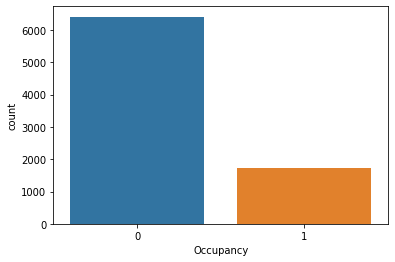

In [5]:
# Подключаем библиотеку для построения диаграмм seaborn
import seaborn as sns
# Строим гистограмму, беря за x столбец "Заполняемость"
sns.countplot(data = occUniq, x = "Occupancy")

# 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

<AxesSubplot:>

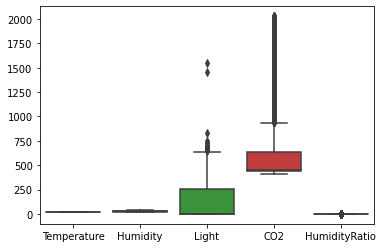

In [6]:
# Диаграмма до мастабирования
sns.boxplot(data = occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

<AxesSubplot:>

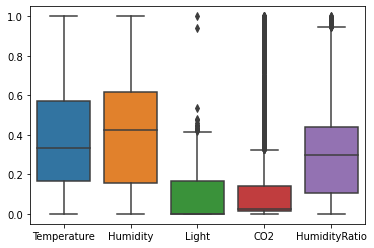

In [7]:
# Производим нормализацию числовых признаков
# Создаем объект класса MinMaxScaler
scaler = preprocessing.MinMaxScaler()
# Преобразуем набор данных с помощью функции fit_transform и затем присваиваем измененные данные объекту occupancy
occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']] = scaler.fit_transform(occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])
# Cтроим отмастабированную диаграмму
sns.boxplot(data = occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

# 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

Категориальные признаки отсутствуют

# 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

<AxesSubplot:>

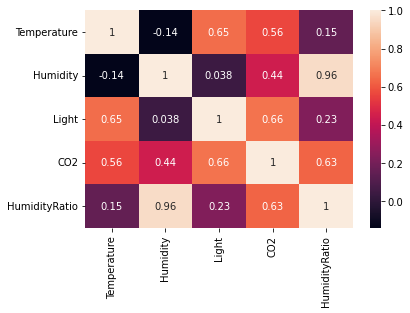

In [8]:
# Находим корреляцию
CorrOcc = occupancy.drop('Occupancy', axis = 1).corr()
# Строим тепловую карту признаков для оценки корреляции
sns.heatmap(CorrOcc, annot = True)

# 7. Заполните пропущенные значения в данных

In [9]:
# узнаем размер массива (количество строк и столбцов) с помощью метода shape:
occupancy.shape

(8143, 7)

In [10]:
# Подсчитываем количество значений во всех столбцах методом count
occupancy.count()

date             8143
Temperature      8143
Humidity         8143
Light            8143
CO2              8143
HumidityRatio    8143
Occupancy        8143
dtype: int64

Пропущенных значений нет

# Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Оцените качество работы классификатора.

In [11]:
# Загрузим тестовую выборку
occ_test = pd.read_csv('datatest2.txt')
occ_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


Проведем нормализацию

In [12]:
#Для удобства отделим числовые столбцы от прочих
numerical_columns = [i for i in occ_test.columns[1:6] if occ_test[i].dtype.name != 'object']
antinumerical_columns = [i for i in occ_test.columns[1:6] if occ_test[i].dtype.name == 'object']

<AxesSubplot:>

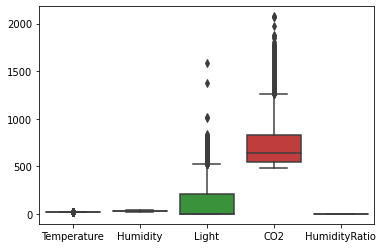

In [13]:
# Диаграмма до мастабирования
sns.boxplot(data = occ_test[numerical_columns])

<AxesSubplot:>

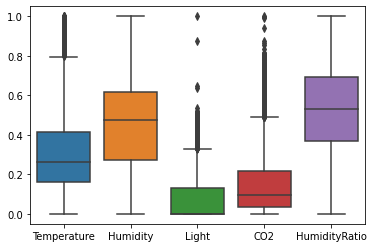

In [14]:
# Проводим нормализацию
scaler = preprocessing.MinMaxScaler()
# Преобразуем набор данных с помощью функции fit_transform и затем присваиваем измененные данные объекту occupancy
occ_test[numerical_columns] = scaler.fit_transform(occ_test[numerical_columns])
# Cтроим отмастабированную диаграмму
sns.boxplot(data = occ_test[numerical_columns])

In [15]:
occ_test.shape

(9752, 7)

In [16]:
occ_test.count()

date             9752
Temperature      9752
Humidity         9752
Light            9752
CO2              9752
HumidityRatio    9752
Occupancy        9752
dtype: int64

Пропущенных данных нет

Релизуем классификацию методом k ближайших соседей:

In [17]:
# Входные и выходные данные тренировочной выборки
x_train, y_train = occupancy[numerical_columns], occupancy['Occupancy']
# Входные и выходные данные тестовой выборки
x_test, y_test = occ_test[numerical_columns], occ_test['Occupancy'] 

In [18]:
# Создаем объект класса "Классификатор ближайших соседей"
knn = KNeighborsClassifier()

# Найдем оптимальные параметры для классификатора с помощью GridSearchCV
# В нашем случае параметр - это количество k ближайших соседей, по которым и будет классифицироваться рассматриваемый объект
# Следовательно, нам нужно получить такое количество ближайших соседей, при сравнении с которым объект будет классифицирован с максимальной точностью
# В этом нам и поможет GridSearchCV. В него первым параметром передаем наш классификатор, а вторым - возможное кол-во ближайших соседей (у нас оно от 1 до 50)
# n_neighbors - количество соседей
knn_grid = GridSearchCV(knn, dict(n_neighbors = [x for x in range(1,50)]))
# Тренируем модель передав ей входные и выходные данные обучающей выборки
knn_grid.fit(x_train, y_train)
# На выходе получаем оптимальное число ближайших соседей
selected_n_neighbors = knn_grid.best_estimator_.n_neighbors
# А также точность предсказаний при таком k
best_score = knn_grid.best_score_
print('best brain score: ', best_score, '| at neighbours number: ', selected_n_neighbors)

# Создаем модель knn по нашим оптимальным данным
knn = KNeighborsClassifier(n_neighbors=selected_n_neighbors)
# Тренируем ее
knn.fit(x_train, y_train)
# Выясняем в каком проценте случаев классификатор дает верный результат
# Для этого используем метод predict класса KNeighborsClassifier
# Передаем ему признаки тестовой выборки и на выходе получаем предсказание к какому классу относится данный объект
# Сравниваем предсказанное значение с настоящим классом данного объекта (содержится в массиве y_test)
# Если результат верный, на выходе получаем 1, если нет – 0. 
# С помощью np_mean находим среднее арифметическое всех нулей и единиц и получаем точность. 
best_score = np.mean(y_test == knn.predict(x_test))
print('test score:', best_score)

best brain score:  0.9328218726008781 | at neighbours number:  44
test score: 0.9487284659557014


Реализуем линейный классификатор (персептрон):

In [19]:
# Создаем объект класса Персептрон
slf = Perceptron()
# Найдем оптимальные параметры для классификатора
# alpfa - константа, которая умножает член регуляризации
# Регуляризация - это метод добавления некоторых дополнительных ограничений к условию
# Чтобы предотвратить некорректное решение поставленной задачи или переобучение
# max_iter - Максимальное количество проходов над данными обучения (иначе говоря, эпохи)
# Каждая эпоха - это итерация обучения перцептрона, во время которой он "подгоняет" веса так, чтобы на выходе получить верный ответ
# alpha может принять одно из значений числовой последовательности с равным шагом из 20 эл-тов
# Последовательность от 0 до 1
# jobs = -1 означает, что мы используем для вычисления все процессоры
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(alpha=np.linspace(0,1,20)[1:],max_iter=[x for x in range(1,50)]), n_jobs=-1)
# Тренируем модель с целью получения оптимальных параметров
paramsearch.fit(x_train, y_train)
# Получаем точность предсказаний лучшей модели
best_score = paramsearch.best_score_
# Получаем параметры лучшей модели
selected_alpha = paramsearch.best_estimator_.alpha
selected_max_iter = paramsearch.best_estimator_.max_iter
print('best score:',best_score,'| alpha:',selected_alpha, '| max_iter:', selected_max_iter)

#создаем модель персептрона по нашим оптимальным данным
perceptron = skl.linear_model.Perceptron(alpha=selected_alpha,max_iter=selected_max_iter)
#тренируем ее
perceptron.fit(x_train, y_train)
#смотрим в каком проценте случаев классификатор дает верный результат
test_score  = np.mean(y_test == perceptron.predict(x_test))
print('test score: ', test_score)

best score: 0.9766651131292015 | alpha: 0.05263157894736842 | max_iter: 3
test score:  0.9638022969647252


Для построения ROC и PR кривых необходимо получить вероятности принадлежности примера к одному из классов, а затем варьировать границу выбора класса. Вероятности можно получить с помощью метода predict_proba

In [20]:
plt.figure(figsize=(10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
    
probas_knn = knn.fit(x_train, y_train).predict_proba(x_test)

#Откалибруем линейный классификатор
#cv - кратность перекрестной проверки
#method - метод калибровки, так как у нас записей больше 1000 то рекомендуется использовать isotonic
# если же данных << 1000 то sigmoid
clf_isotonic = CalibratedClassifierCV(perceptron, cv=10, method='isotonic')
clf_isotonic.fit(x_train, y_train)
probas_slf = clf_isotonic.predict_proba(x_test)

<Figure size 720x576 with 0 Axes>

PR кривые

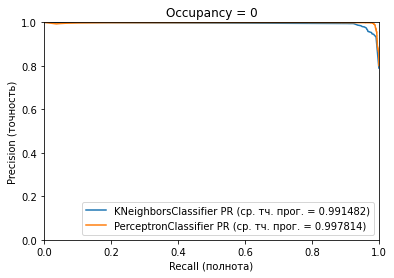

In [23]:
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_knn[:,0])
aps_knn0 = average_precision_score(y_test_invers,probas_knn[:,0])
plt.plot(recall, precision, label='KNeighborsClassifier PR (ср. тч. прог. = %f)' % (aps_knn0)) 

# Персептрон
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_slf[:,0])
aps_ptron0 = average_precision_score(y_test_invers,probas_slf[:,0])
plt.plot(recall, precision, label='PerceptronClassifier PR (ср. тч. прог. = %f)' % (aps_ptron0)) 

# вывод графика
plt.xlabel('Recall (полнота)')
plt.ylabel('Precision (точность)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()

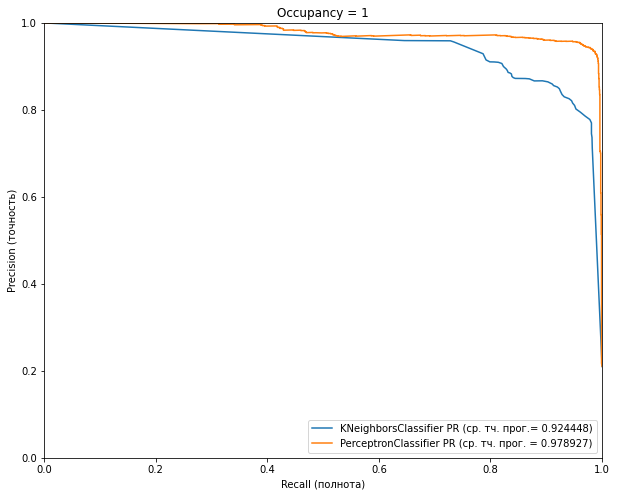

In [24]:
plt.figure(figsize=(10,8))

# K соседей
precision, recall, thresholds = precision_recall_curve(y_test, probas_knn[:,1])
aps_knn1 = average_precision_score(y_test,probas_knn[:,1])
plt.plot(recall, precision, label='KNeighborsClassifier PR (ср. тч. прог.= %f)' % (aps_knn1)) 

# Персептрон
precision, recall, thresholds = precision_recall_curve(y_test, probas_slf[:,1])
aps_ptron1 = average_precision_score(y_test,probas_slf[:,1])
plt.plot(recall, precision, label='PerceptronClassifier PR (ср. тч. прог. = %f)' % (aps_ptron1)) 

# вывод графика
plt.xlabel('Recall (полнота)')
plt.ylabel('Precision (точность)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()

ROC графики

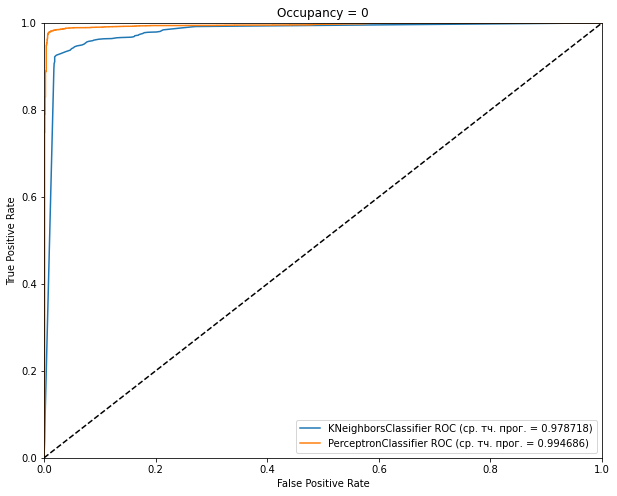

In [22]:
#TPR тоже самое что и Recall, те полнота
#FPR показывает, какую долю из объектов negative класса алгоритм предсказал неверно
plt.figure(figsize=(10,8))

# K соседей
tpr, fpr, thresholds = roc_curve(y_test, probas_knn[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNeighborsClassifier ROC (ср. тч. прог. = %f)' % (roc_auc)) 

# Персептрон
tpr, fpr, thresholds = roc_curve(y_test, probas_slf[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='PerceptronClassifier ROC (ср. тч. прог. = %f)' % (roc_auc))   

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()

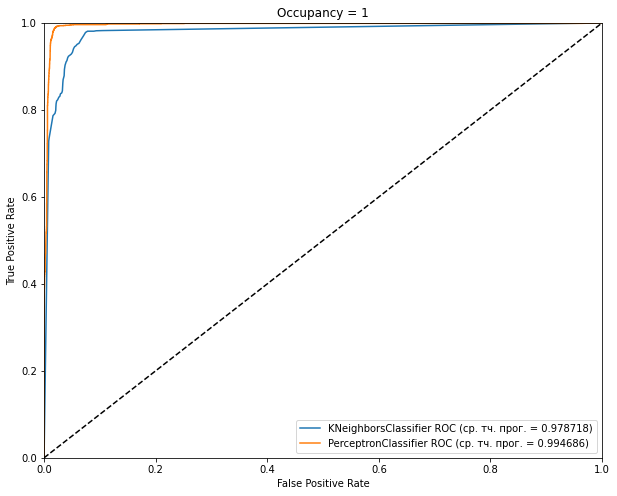

In [25]:
plt.figure(figsize=(10,8))

# K соседей
fpr, tpr, thresholds = roc_curve(y_test, probas_knn[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNeighborsClassifier ROC (ср. тч. прог. = %f)' % (roc_auc))

# PerceptronClassifier
fpr, tpr, thresholds = roc_curve(y_test, probas_slf[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='PerceptronClassifier ROC (ср. тч. прог. = %f)' % (roc_auc)) 

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()

# 9.Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Классификаторы решают задачу классификации с вероятностью 0.94-0.96 процентов, что является очень хорошим результатом для двух классов. 
Персептрон более эффективен, чем классификатор k ближайших соседей, т.к. имеет хорошо подобранные параметры и многослойную сетку. 
Таким образом, задача классификации была решена корректно.